In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [3]:
I_ampa_poisson=np.load('I_ampa_poisson.npy',allow_pickle=True)
I_ampa=np.load('I_ampa.npy',allow_pickle=True)

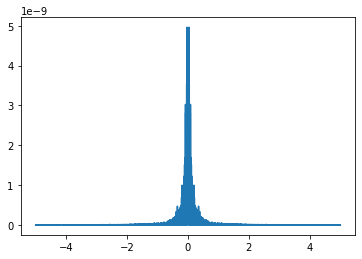

In [10]:
ps = np.abs(np.fft.fft(I_ampa_poisson))**2

time_step = 1 / 10
freqs = np.fft.fftfreq(I_ampa_poisson.size, time_step)
idx = np.argsort(freqs)
ps[0]=0
plt.plot(freqs[idx], ps[idx])

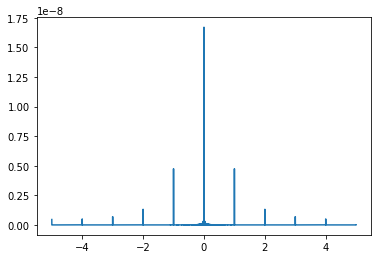

In [11]:
ps = np.abs(np.fft.fft(I_ampa))**2

time_step = 1 / 10
freqs = np.fft.fftfreq(I_ampa_poisson.size, time_step)
idx = np.argsort(freqs)
ps[0]=0

plt.plot(freqs[idx], ps[idx])

In [12]:
def bin_spikes(spike_times,spike_clusters, bin_size = 10):

    # Using clusters._phy_annotation.npy obtain valid clusters (i.e. >= 2)
    # valid_clusters_idx = np.array(np.where(clusters_annotation>=2))[0]

    spike_time_cells = np.empty(100, dtype=object) # Initalise empty object
    for i in (np.arange(len(np.unique(spike_clusters)))):
      # Create a spike time arrays, where each array in the array is a spike time of a cell
      spike_time_cells[i] = spike_times[(np.where(spike_clusters == i)[0])]

    # Bin spike times into 10ms intervals
    spike_time_binned = np.empty(len(np.unique(spike_clusters)), dtype=object) # Initalise empty object
    sum_spikes = np.empty(len(np.unique(spike_clusters)), dtype=object) # Initalise empty object

    for cell_num in np.arange(len(spike_time_cells)):
        spike_time_hist = np.histogram(spike_time_cells[cell_num],bins = np.arange(0,np.floor(spike_time_cells[cell_num][-1]),bin_size))
        spike_time_binned[cell_num] = spike_time_hist[0]
        sum_spikes[cell_num] = np.sum(spike_time_binned[cell_num])

    cell_spikes_max = np.argmax(sum_spikes) # cell with the maximum number of spikes for plotting purposes
    # Spike_time_binned returns binned spikes sorted into cells
    # Spike_time_cells returns UNbinned spikes sorted into cells
    # cell_spikes_max returns a single cell index that has the max number of spikes (i.e most active cell)
    return spike_time_binned, spike_time_cells, cell_spikes_max

In [20]:
spks=np.load('Mgpt.npy')*1000
spk_clusters=np.load('Mgpi.npy')

In [21]:
print(spks)

[   0.     0.     0.  ... 9989.4 9997.3 9997.8]


In [58]:
spike_time_binned, spike_time_cells, cell_spikes_max= bin_spikes(spks,spk_clusters, bin_size = 10)

In [65]:
spike_time_binned[1].shape

(997,)

In [66]:
def convert_for_pca(binned_spikes):
    spk_arr=[]
    for j in range(binned_spikes.shape[0]):
        spk_arr.append(list(binned_spikes[j])+[0]*(10000-binned_spikes[j].shape[0]))
    spk_arr=np.array(spk_arr).reshape(100,-1)
    return spk_arr

In [67]:
spk_arr=convert_for_pca(spike_time_binned)

In [74]:
np.where(spk_arr!=0)

(array([ 0,  0,  0, ..., 99, 99, 99]),
 array([  0,  30,  59, ..., 982, 990, 995]))

In [78]:
pca=PCA(n_components)
pca.fit(spk_arr.T)
var_exp=pca.explained_variance_ratio_

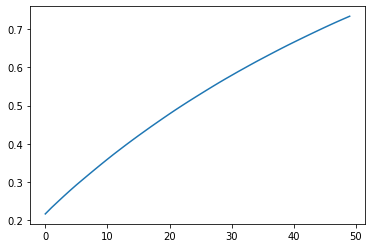

In [81]:
plt.plot(np.cumsum(var_exp))

In [82]:
spks_poisson=np.load('Mgpt_poisson.npy')*1000
spk_clusters_poisson=np.load('Mgpi_poisson.npy')

In [83]:
spike_time_binned_poisson, spike_time_cells, cell_spikes_max= bin_spikes(spks_poisson,spk_clusters_poisson, bin_size = 10)

In [84]:
spk_arr_poisson=convert_for_pca(spike_time_binned_poisson)

In [86]:
pca=PCA(n_components=50)
pca.fit(spk_arr_poisson.T)
var_exp_poisson=pca.explained_variance_ratio_

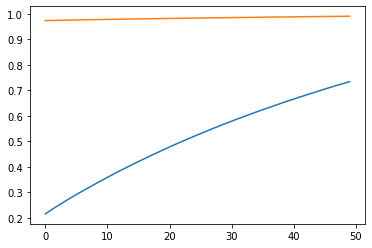

In [87]:
plt.plot(np.cumsum(var_exp))
plt.plot(np.cumsum(var_exp_poisson))